# Building Our First AI Agent

In this notebook, we'll build our first Question Answering (QA) agent using Large Language Models (LLMs). We're going to start with the simplest possible setup: a basic QA agent that takes a question in the form of a text and provides the answer in text using only the knowledge embedded in the LLM itself. 

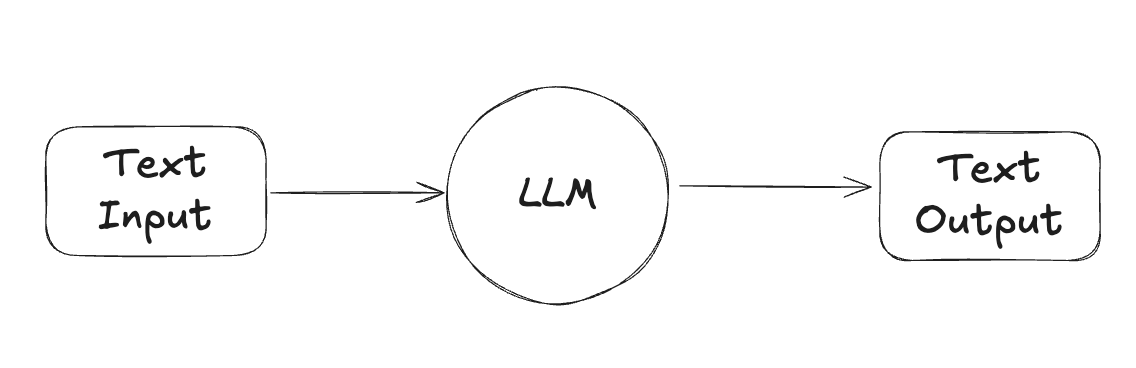

This straightforward implementation serves as the foundation for our journey. As we progress, we'll evolve this basic agent into a sophisticated AI system capable of understanding your digital content, analyzing files of various formats, and helping you control your PC! 

# Setup

### Setting Up Your OpenAI API Key

To use the OpenAI API, you need to create a `.env` file in the same folder as your project and add your API key.

#### Steps:
1. Create a file named `.env` in your project folder.
2. Add the following line to the file, replacing `sk-your-actual-key-here` with your actual OpenAI API key:
   
   ```env
   OPENAI_API_KEY=sk-your-actual-key-here


### Don't Have an API Key?

Follow these steps to generate one:

1. Visit [platform.openai.com](https://platform.openai.com).
2. **Sign up** or **Log in** to your account.
3. Navigate to **Settings** → **API keys** → **Create new secret key**.
4. Copy the generated API key and add it to your `.env` file.

**Note**: Keep your API key secure and do not share it publicly!


### Let's set the environment up with the necessary dependencies

In [1]:
import os
import openai
from dotenv import load_dotenv

# Get API key from .env file
load_dotenv()
client = openai.OpenAI(
    api_key=os.getenv('OPENAI_API_KEY')
)

## Your First AI Chat

Let's start simple. We'll create a python function that takes your question and gets an answer from an OpenAI LLM:

In [2]:
def ask_llm(question: str) -> str:
    """Send a question to the LLM and get its response."""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "user", "content": question}
        ]
    )
    return response.choices[0].message.content

# Try it out!
question = "What is a Large Language Model in 2 sentences?"
print(f"Q: {question}")
print(f"A: {ask_llm(question)}")

Q: What is a Large Language Model in 2 sentences?
A: A Large Language Model (LLM) is a type of artificial intelligence system that is capable of processing and generating human-like text based on vast amounts of data. These models have been trained on extensive datasets and can understand and produce language in a more complex and nuanced way compared to traditional AI models.


## Looking Under the Hood

Let's understand the code that we wrote in the `ask_ai` function. For the question-answer use case, we can use OpenAI's chat completions API (`client.chat.completions.create`). This is designed specifically for conversational AI where we send messages and get responses back from the LLM. Let's break down how it works:

### Choosing the LLM 

If you see the first parameter of the chat completions API, we're specifying the **LLM model** that we want to use. 

OpenAI provides several LLM models (calle the GPT-series) to balance **capabilities**, **latency**, and **cost**. Below is a summary of 3 of the most commonly used models from OpenAI:

#### 1. gpt-4o-mini
- **Description**: A cost-effective and efficient model tailored for **fast, lightweight tasks**.
- **Capabilities**: Accepts both **text** and **image** inputs, outputs **text**.
- **Use Cases**: Ideal for basic queries, summaries, and low-complexity tasks.

#### 2. gpt-4o
- **Description**: A high-performing model optimized for **complex, multi-step tasks**.
- **Capabilities**: Supports both **text** and **image** inputs, produces **text** output.
- **Use Cases**: Best suited for detailed reasoning, problem-solving, and multi-modal tasks.
- **Trade-offs**: Slower and more expensive compared to *gpt-4o-mini*.

#### 3. gpt-3.5-turbo
- **Description**: A fast and low-cost model with strong performance for most **text-only tasks**.
- **Capabilities**: Accepts **text** input and provides **text** output.
- **Use Cases**: Effective for applications like chatbots, coding assistance, and content generation.


### Messages and Roles

The second parameter in the chat completions API is a `messages` parameter that represents a conversation history. Here, each message is defined by its role and content. Below is an example:

```python
messages = [
    {
        "role": "system",    
        "content": "You are a helpful coding assistant"  # Instructions for the AI's behavior
    },
    {
        "role": "user",      
        "content": "How do I write a for loop in Python?"  # The user's message
    },
    {
        "role": "assistant", 
        "content": "Here's how you write a for loop..."  # The AI's response
    }
]



* `system`: Sets the basic instructions and behavior for the AI (e.g., "You are a helpful coding assistant"). This is typically used once at the start of a conversation.

* `user`: Contains messages from the human user - their questions, requests, or statements. These form the main part of what the LLM responds to.

* `assistant`: Contains the LLM's own previous responses in the conversation. These help maintain context and conversation flow.

### API Response Structure

Let's examine how the chat completions API response is structured when we get a completion from the model. The heart of the response - the actual text generated by the LLM - is found in `response.choices[0].message.content`. You might wonder why we use `choices[0]` - this is because the API supports generating multiple alternative completions for the same prompt, though we typically only request one response. Think of it like asking multiple experts the same question and getting different perspectives!

Key points to understand about the response structure:

- The response is nested, with the content we want tucked inside the choices array
- Each choice contains a message object with the actual response
- The message includes both the content (the text) and the role (who's speaking)

In [3]:
# Here's how we make our request:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",      # Which model we want to use
    messages=[                   # The conversation history
        {"role": "user",        # Who is speaking (user/assistant/system)
         "content": question}   # What they're saying
    ]
)

# Now, let's see what we get back! We'll ask a simple question:
question = "What is the capital of France?"
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": question}]
)

# Let's explore the response object:
print("\n1️⃣ Basic Information - Metadata about our request")
print(f"ID: {response.id}")                    # Unique identifier for this completion
print(f"Model: {response.model}")              # Which model answered
print(f"Created: {response.created}")          # Timestamp of the response

print("\n2️⃣ The Response Content - What the model actually said")
print(f"Content: {response.choices[0].message.content}")  # The model's answer
print(f"Role: {response.choices[0].message.role}")       # Who's speaking (always 'assistant')
print(f"Finish Reason: {response.choices[0].finish_reason}")  # Why the response ended

print("\n3️⃣ Usage Statistics - Token counts for billing and context length")
print(f"Prompt Tokens: {response.usage.prompt_tokens}")      # Tokens in our question
print(f"Completion Tokens: {response.usage.completion_tokens}")  # Tokens in the answer
print(f"Total Tokens: {response.usage.total_tokens}")        # Total tokens used


1️⃣ Basic Information - Metadata about our request
ID: chatcmpl-AcgbdVA8eZWVawluUGjv4tE132jcC
Model: gpt-3.5-turbo-0125
Created: 1733783605

2️⃣ The Response Content - What the model actually said
Content: The capital of France is Paris.
Role: assistant
Finish Reason: stop

3️⃣ Usage Statistics - Token counts for billing and context length
Prompt Tokens: 14
Completion Tokens: 7
Total Tokens: 21


## What Happens Behind the Scenes

When you send a prompt to the chat completions API, a fascinating process unfolds in milliseconds. Let's walk through this journey:

1. **Breaking Down Text**  
   Your text is split into smaller pieces called **tokens**. Think of tokens as the basic building blocks - they could be common words, parts of words, or even single characters. These are the building blocks of language that the model processes.

2. **Translating to AI Language**  
   These tokens then transform into **numerical vectors** (known as **embeddings**). Imagine this as translating human language into a mathematical form that AI understands - where words and concepts become coordinates in a vast **high-dimensional space**. In this space, similar concepts naturally cluster together.

3. **Processing with Neural Networks**  
   Now comes the real magic: the model processes these vectors through its **neural networks**. Using patterns it learned during training, it begins to understand your input's meaning, context, and implications.

4. **Generating Output**  
   The model then crafts its response, but interestingly, it does this **one token at a time**. Each new token is carefully chosen based on all the tokens that came before it, ensuring a coherent and contextual response.

5. **Back to Human Language**  
   These output tokens are converted back into **human-readable text**. What started as mathematical vectors return as natural language we can understand.

6. **Adding Extra Insights**  
   Finally, the API enriches the response with helpful metadata like **usage statistics**, giving us insight into how the model processed our request.

This sophisticated embedding-based approach is what enables the model to grasp subtle connections between concepts and generate nuanced, context-aware responses. It's like having a brilliant conversationalist who can draw upon vast knowledge to engage in meaningful dialogue. 🚀

## Enhancing Our AI Agent with System Instructions

So far, we've created a basic AI agent that can answer questions. However, we can make it more powerful and focused by adding system instructions. System instructions help define the AI's behavior, expertise, and constraints.


In [5]:
def ask_llm_with_system_instruction(question: str, system_instruction: str) -> str:
    """Send a question to the LLM with a system instruction."""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_instruction},
            {"role": "user", "content": question}
        ]
    )
    return response.choices[0].message.content

# Example: Creating a Python coding assistant
system_instruction = """You are a Python programming expert. 
Provide clear, concise code examples with comments. 
Only provide code and nothing else."""

question = "How do I read a CSV file in Python?"
print(f"Q: {question}")
print(f"A: {ask_llm_with_system_instruction(question, system_instruction)}")

Q: How do I read a CSV file in Python?
A: ```python
import csv

# Open the CSV file
with open('data.csv', newline='') as csvfile:
    # Create a CSV reader object
    csvreader = csv.reader(csvfile)
    
    # Loop through each row in the CSV file
    for row in csvreader:
        # Access data in each row
        print(row)
```  


In [6]:
# Example: Creating a technical documentation writer
system_instruction = """Answer only using emojis"""

question = "Plot of the movie Titanic"
print(f"Q: {question}")
print(f"A: {ask_llm_with_system_instruction(question, system_instruction)}")

Q: Plot of the movie Titanic
A: 🛳️🌊💑💔🚪🎻🎶🏊‍♂️🧊🚑🪦🪕🔙🔚💕⚓🎬


## Creating a Resuable OpenAILLM class

In [7]:
from typing import Optional, List, Dict, Any

class OpenAILLM:
    """Base class for interacting with OpenAI Large Language Models"""

    def __init__(self):
        """Initializes the LLM client"""
        load_dotenv()
        api_key = os.getenv('OPENAI_API_KEY')

        self.client = openai.OpenAI(api_key = api_key)

    def ask(self,
            user_question: str,
            system_message: Optional[str] = None,
            model: str = "gpt-3.5-turbo") -> str:
        """Method to get response from an OpenAI LLM for a user's question in text. 

        Args:
            user_question: The user's question in text
            system_message: Optional system message to control the LLM's behavior
            model: The model to use (default: gpt-3.5-turbo)

        Returns:
            The model's response as a string
        """
        messages = []
        if system_message:
            messages.append({"role": "system", "content": system_message})
        messages.append({"role": "user", "content": user_question})

        response = self.client.chat.completions.create(
            model=model,
            messages=messages,
        )

        return response.choices[0].message.content

In [8]:
llm = OpenAILLM()

response = llm.ask("What is machine learning in 2 sentences?")
print (f"A: {response}")

A: Machine learning is a subset of artificial intelligence that involves developing algorithms and statistical models that enable software applications to learn and improve from experience without being explicitly programmed. It allows computers to analyze and interpret complex data patterns to make predictions or decisions without human intervention.


## Making it Interactive with Gradio

Let's create a simple web interface for our AI agent using Gradio. This will allow users to interact with the model through a user-friendly interface.


In [9]:
import gradio as gr

# Define our chat function for Gradio
def chat_interface(message, system_instruction, history):
    """Handle chat interactions through Gradio."""
    response = llm.ask(message, system_instruction)
    history.append({"role": "user", "content": message})
    history.append({"role": "assistant", "content": response})
    return "", history

# Create the Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("# Question-Answering AI Agent")
    
    with gr.Row():
        with gr.Column():
            system = gr.Textbox(
                label="System Instruction",
                placeholder="Set the AI's behavior...",
                value="You are a helpful assistant."
            )
    
    chatbot = gr.Chatbot(type='messages')  # Specify type='messages' for the new format
    msg = gr.Textbox(label="Message")
    clear = gr.Button("Clear")

    msg.submit(chat_interface, [msg, system, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Limitations of the simple QA agent

In [10]:
limitations = [
    "What files are in my Downloads folder?",
    "What's the weather in New York right now?",
    "Can you read the PDF I just downloaded?",
    "Find the image where I'm in Machu Pichu",
    "What did we talk about yesterday?",
    "Can you help me analyze data from my monthly_spending.csv file?"
]

print("Testing our AI's current capabilities:")
for question in limitations:
    print(f"\nQ: {question}")
    print(f"A: {llm.ask(question)}")

Testing our AI's current capabilities:

Q: What files are in my Downloads folder?
A: I'm sorry, but I am unable to access or see the contents of your Downloads folder. You would need to check the folder on your device to see what files are in it.

Q: What's the weather in New York right now?
A: I'm sorry, but I am unable to provide real-time weather updates. I recommend checking a trusted weather website or using a weather app on your phone for the most up-to-date information on the weather in New York.

Q: Can you read the PDF I just downloaded?
A: I'm sorry, but I am unable to read PDF documents. However, I can help answer any questions you may have about the content of the PDF or provide general information on the topic.

Q: Find the image where I'm in Machu Pichu
A: I'm sorry, but I cannot provide images as a text-based AI. However, you can try searching for images of Machu Picchu on a search engine, and see if you can find yourself in any of the images.

Q: What did we talk about 

### Running this code, you'll notice our current QA agent has clear limitations:

#### 1. It Cannot Access Your Files
- Cannot read your documents, PDFs, or access your computer's folders
- Only sees what you directly share in the conversation

#### 2. It Lacks Multi-Modal Capabilities
- Cannot process or understand images, audio or video input
- No ability to work with different type of media files

#### 3. It Cannot Control Your Computer
- Unable to open applications
- Cannot perform actions on your PC
- No ability to interact with your system

#### 4. It Has No Conversation Memory
- Each chat starts completely fresh, like meeting someone for the first time
- Previous conversations are not retained or accessible


### These limitations exist because right now, our QA agent
- Can't access external files or data
- Can only handle text input and output
- Has no ability to physically interact with your computer
- Only processes the current query in isolation
- Has no persistent memory between queries


## So What's Next?

In the upcoming notebooks, we'll build increasingly capable agents:

1. **Text-Enhanced Agent**

- Read and understand text files
- Answer questions using content from documents
- Handle different text formats effectively

2. **Media-Aware Agents**

- Process and answer questions using images
- Extract information from audio files
- Understand and analyze video content
- Combine all media types for comprehensive answers

3. **File System Navigator**

- Monitor and interact with your file system
- Answer questions about your files and folders
- Keep track of file changes automatically

4. **System Control Agent**

- Use tools to control your computer
- Execute commands on your behalf
- Automate computer tasks as needed

Each notebook will build upon the previous one, gradually transforming our simple QA agent into a comprehensive PC assistant that can work with any type of file and help you control your computer! 🚀